In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D
import re
matplotlib.rc('text',usetex=True)
matplotlib.rcParams['font.family'] = 'sans'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['legend.fontsize'] = 10
matplotlib.rcParams['font.serif'] = ['Times New Roman']
matplotlib.rcParams['lines.linewidth'] = 1.5
matplotlib.rcParams['lines.markersize'] = 5
matplotlib.rcParams['lines.markeredgewidth'] = 2
matplotlib.rcParams['axes.linewidth'] = 1.5
matplotlib.rcParams['xtick.major.size'] = 5
matplotlib.rcParams['xtick.minor.size'] = 2
matplotlib.rcParams['ytick.major.size'] = 5
matplotlib.rcParams['ytick.minor.size'] = 2

In [3]:
#Load data

#CCSDT

water2_cc_file = 'water2-ccsdt-aug-cc-pvtz.dat'
zn_h2o_cc_file = 'zn-hoh-ccsdt-aug-cc-pvtz.dat'
f_h2o_cc_file  = 'f-hoh-ccsdt-aug-cc-pvtz.dat'
cl_h2o_cc_file  = 'cl-hoh-ccsdt-aug-cc-pvtz.dat'
oh_h2o_cc_file  = 'f-hoh-ccsdt-aug-cc-pvtz.dat'

cc_ref = {}
cc_ref['water2'] = pd.read_csv(water2_cc_file,sep='\s+',header=0,comment='#',index_col=False)
cc_ref['zn_h2o'] = pd.read_csv(zn_h2o_cc_file,sep='\s+',header=0,comment='#')
cc_ref['f_h2o']  = pd.read_csv(f_h2o_cc_file,sep='\s+',header=0,comment='#')
cc_ref['cl_h2o']  = pd.read_csv(cl_h2o_cc_file,sep='\s+',header=0,comment='#')
cc_ref['oh_h2o']  = pd.read_csv(oh_h2o_cc_file,sep='\s+',header=0,comment='#')

In [4]:
cc_ref['oh_h2o']

Eint
0   161.48
1    70.72
2    21.67
3    -5.16
4   -19.70
5   -27.20
6   -30.62
7   -31.61
8   -31.18
9   -29.94
10  -20.91
11  -13.92
12   -9.59
13   -6.93
14   -5.23
15   -4.10
16   -3.30

In [5]:
#SAPT2

water2_sapt2_file = 'Result-water2-sapt2-aug-cc-pvtz.dat'
zn_h2o_sapt2_file = 'Result-zn-hoh-sapt2-aug-cc-pvtz.dat'
f_h2o_sapt2_file  = 'Result-f-hoh-sapt2-aug-cc-pvtz.dat'
cl_h2o_sapt2_file = 'Result-cl-hoh-sapt2-aug-cc-pvtz.dat'
oh_h2o_sapt2_file = 'Result-f-hoh-sapt2-aug-cc-pvtz.dat'

sapt2 = {}
sapt2['water2'] = pd.read_csv(water2_sapt2_file,sep='\s+',header=0,comment='#')
sapt2['zn_h2o'] = pd.read_csv(zn_h2o_sapt2_file,sep='\s+',header=0,comment='#')
sapt2['f_h2o']  = pd.read_csv(f_h2o_sapt2_file,sep='\s+',header=0,comment='#')
sapt2['cl_h2o'] = pd.read_csv(cl_h2o_sapt2_file,sep='\s+',header=0,comment='#')
sapt2['oh_h2o'] = pd.read_csv(oh_h2o_sapt2_file,sep='\s+',header=0,comment='#')


In [6]:
#SAPT2+3

water2_sapt2p3_file = 'Result-water2-sapt2+3-aug-cc-pvtz.dat'
zn_h2o_sapt2p3_file = 'Result-zn-hoh-sapt2+3-aug-cc-pvtz.dat'
f_h2o_sapt2p3_file  = 'Result-f-hoh-sapt2+3-aug-cc-pvtz.dat'
cl_h2o_sapt2p3_file = 'Result-cl-hoh-sapt2+3-aug-cc-pvtz.dat'
oh_h2o_sapt2p3_file = 'Result-f-hoh-sapt2+3-aug-cc-pvtz.dat'

sapt2p3 = {}
sapt2p3['water2'] = pd.read_csv(water2_sapt2p3_file,sep='\s+',header=0,comment='#')
sapt2p3['zn_h2o'] = pd.read_csv(zn_h2o_sapt2p3_file,sep='\s+',header=0,comment='#')
sapt2p3['f_h2o']  = pd.read_csv(f_h2o_sapt2p3_file,sep='\s+',header=0,comment='#')
sapt2p3['cl_h2o'] = pd.read_csv(cl_h2o_sapt2p3_file,sep='\s+',header=0,comment='#')
sapt2p3['oh_h2o'] = pd.read_csv(oh_h2o_sapt2p3_file,sep='\s+',header=0,comment='#')

In [7]:
#SAPTDFT(PBE0)

water2_saptdft_pbe0_file = 'result-water2-saptdft-aug-cc-pvtz-pbe0.dat'
zn_h2o_saptdft_pbe0_file = 'result-zn-hoh-saptdft-aug-cc-pvtz-pbe0.dat'
f_h2o_saptdft_pbe0_file  = 'f-hoh-saptdft-wac-aug-ccpvtz-pbe0.dat'
cl_h2o_saptdft_pbe0_file = 'cl-hoh-saptdft-wac-aug-ccpvtz-pbe0.dat'
oh_h2o_saptdft_pbe0_file = 'oh-hoh-saptdft-wac-aug-ccpvtz-pbe0.dat'

saptdft_pbe0 = {}
saptdft_pbe0['water2'] = pd.read_csv(water2_saptdft_pbe0_file,sep='\s+',header=0,comment='#')
saptdft_pbe0['zn_h2o'] = pd.read_csv(zn_h2o_saptdft_pbe0_file,sep='\s+',header=0,comment='#')
saptdft_pbe0['f_h2o']  = pd.read_csv(f_h2o_saptdft_pbe0_file,sep='\s+',header=0,comment='#')
saptdft_pbe0['cl_h2o'] = pd.read_csv(cl_h2o_saptdft_pbe0_file,sep='\s+',header=0,comment='#')
saptdft_pbe0['oh_h2o'] = pd.read_csv(oh_h2o_saptdft_pbe0_file,sep='\s+',header=0,comment='#')

#SAPTDFT(PBE0) NO AC

f_h2o_saptdft_pbe0_noac_file  = 'f-hoh-saptdft-noac-aug-ccpvtz-pbe0.dat'
cl_h2o_saptdft_pbe0_noac_file = 'cl-hoh-saptdft-noac-aug-ccpvtz-pbe0.dat'
oh_h2o_saptdft_pbe0_noac_file = 'oh-hoh-saptdft-noac-aug-ccpvtz-pbe0.dat'

saptdft_pbe0_noac = {}
saptdft_pbe0_noac['f_h2o']  = pd.read_csv(f_h2o_saptdft_pbe0_noac_file,sep='\s+',header=0,comment='#')
saptdft_pbe0_noac['cl_h2o'] = pd.read_csv(cl_h2o_saptdft_pbe0_noac_file,sep='\s+',header=0,comment='#')
saptdft_pbe0_noac['oh_h2o'] = pd.read_csv(oh_h2o_saptdft_pbe0_noac_file,sep='\s+',header=0,comment='#')


In [8]:
# SAPTDFT(B3LYP)

water2_saptdft_b3lyp_file = 'result-water2-saptdft-aug-cc-pvtz-b3lyp.dat'
zn_h2o_saptdft_b3lyp_file = 'result-zn-hoh-saptdft-aug-cc-pvtz-b3lyp.dat'

saptdft_b3lyp = {}
saptdft_b3lyp['water2'] = pd.read_csv(water2_saptdft_b3lyp_file,sep='\s+',header=0,comment='#')
saptdft_b3lyp['zn_h2o'] = pd.read_csv(zn_h2o_saptdft_b3lyp_file,sep='\s+',header=0,comment='#')

In [9]:
#DFT(B3LYP)

water2_b3lyp_file = 'water2-b3lyp.dat'
zn_h2o_b3lyp_file = 'zn-hoh-b3lyp.dat'
f_h2o_b3lyp_file  = 'result-f-hoh-almo-aug-cc-pvtz-b3lyp.dat'
cl_h2o_b3lyp_file = 'result-cl-hoh-almo-aug-cc-pvtz-b3lyp.dat'
oh_h2o_b3lyp_file = 'result-oh-hoh-almo-aug-cc-pvtz-b3lyp.dat'

dft_b3lyp = {}
dft_b3lyp['water2'] = pd.read_csv(water2_b3lyp_file,sep='\s+',header=0,comment='#',index_col=False)
dft_b3lyp['zn_h2o'] = pd.read_csv(zn_h2o_b3lyp_file,sep='\s+',header=0,comment='#',index_col=False)
dft_b3lyp['f_h2o']  = pd.read_csv(f_h2o_b3lyp_file,sep='\s+',header=0,comment='#')
dft_b3lyp['cl_h2o'] = pd.read_csv(cl_h2o_b3lyp_file,sep='\s+',header=0,comment='#')
dft_b3lyp['oh_h2o'] = pd.read_csv(oh_h2o_b3lyp_file,sep='\s+',header=0,comment='#')


In [10]:
dft_b3lyp['zn_h2o']

Eint
0   -53.06
1   -81.73
2   -96.49
3  -102.62
4  -103.47
5  -101.16
6   -97.05
7   -92.00
8   -86.55
9   -81.06
10  -75.73
11  -70.70
12  -66.03
13  -61.76
14  -57.92
15  -56.49

In [11]:
#DFT(PBE0)

water2_pbe0_file = 'water2-pbe0.dat'
zn_h2o_pbe0_file = 'zn-hoh-pbe0.dat'
f_h2o_pbe0_file  = 'result-f-hoh-almo-aug-cc-pvtz-pbe0.dat'
cl_h2o_pbe0_file = 'result-cl-hoh-almo-aug-cc-pvtz-pbe0.dat'
oh_h2o_pbe0_file = 'result-oh-hoh-almo-aug-cc-pvtz-pbe0.dat'

dft_pbe0 = {}
dft_pbe0['water2'] = pd.read_csv(water2_pbe0_file,sep='\s+',header=0,comment='#',index_col=False)
dft_pbe0['zn_h2o'] = pd.read_csv(zn_h2o_pbe0_file,sep='\s+',header=0,comment='#',index_col=False)
dft_pbe0['f_h2o']  = pd.read_csv(f_h2o_pbe0_file,sep='\s+',header=0,comment='#')
dft_pbe0['cl_h2o'] = pd.read_csv(cl_h2o_pbe0_file,sep='\s+',header=0,comment='#')
dft_pbe0['oh_h2o'] = pd.read_csv(oh_h2o_pbe0_file,sep='\s+',header=0,comment='#')



In [12]:
dft_pbe0['f_h2o']

FRZ         POL     RS-Ct1    SCF-Ct1      RS-TOT     SCF-TOT
0.7  393.736595 -193.433756 -42.052793 -43.289657  158.250043  157.013182
0.8  244.867192 -138.550272 -38.481878 -39.655143   67.835045   66.661777
0.9  151.312865  -98.556655 -33.743867 -34.815747   19.012340   17.940463
1.0   91.296996  -70.278588 -28.596338 -29.562493   -7.577930   -8.544085
1.1   52.286957  -50.581566 -23.557539 -24.418052  -21.852148  -22.712660
1.2   26.804553  -36.858731 -19.041952 -19.799792  -29.096130  -29.853970
1.3   10.225871  -27.206830 -15.268630 -15.936570  -32.249589  -32.917532
1.4   -0.405989  -20.361290 -12.237589 -12.830784  -33.004865  -33.598061
1.5   -7.041767  -15.486937  -9.836762 -10.366039  -32.365468  -32.894743
1.6  -11.006839  -12.005015  -7.931308  -8.403711  -30.943163  -31.415565
2.1  -14.016980   -4.545639  -2.834612  -3.083781  -21.397230  -21.646400
2.6  -10.822699   -2.378103  -1.046954  -1.170985  -14.247753  -14.371785
3.1   -8.019843   -1.380337  -0.442150  -0.509328   -9.842331   -9.909509
3.6   -6.110264   -0.844514  -0.156877  -0.198227   -7.111655   -7.153005
4.1   -4.723460   -0.542358  -0.089353  -0.116866   -5.355173   -5.382684
4.6   -3.818159   -0.363483   0.005456  -0.012908   -4.176186   -4.194550
5.1   -3.086384   -0.252195  -0.013427  -0.025508   -3.352006   -3.364088

In [13]:
# Distance 
water2_d_file = 'distance_water2.dat'
zn_h2o_d_file = 'distance_zn_hoh.dat'
f_h2o_d_file  = 'distance_f_hoh.dat'
cl_h2o_d_file = 'distance_cl_hoh.dat'
oh_h2o_d_file = 'distance_oh_hoh.dat'

d = {}
d['water2'] = pd.read_csv(water2_d_file,sep='\s+',header=0,comment='#')
d['zn_h2o'] = pd.read_csv(zn_h2o_d_file,sep='\s+',header=0,comment='#')
d['f_h2o']  = pd.read_csv(f_h2o_d_file,sep='\s+',header=0,comment='#')
d['cl_h2o'] = pd.read_csv(cl_h2o_d_file,sep='\s+',header=0,comment='#')
d['oh_h2o'] = pd.read_csv(oh_h2o_d_file,sep='\s+',header=0,comment='#')




In [14]:
d['water2']

d
0   1.54
1   1.74
2   1.84
3   1.94
4   2.03
5   2.14
6   2.24
7   2.34
8   2.54
9   3.04
10  4.04
11  5.04

Text(0.5, 1.0, 'OH$^{-}$ \\dots H$_{2}$O')

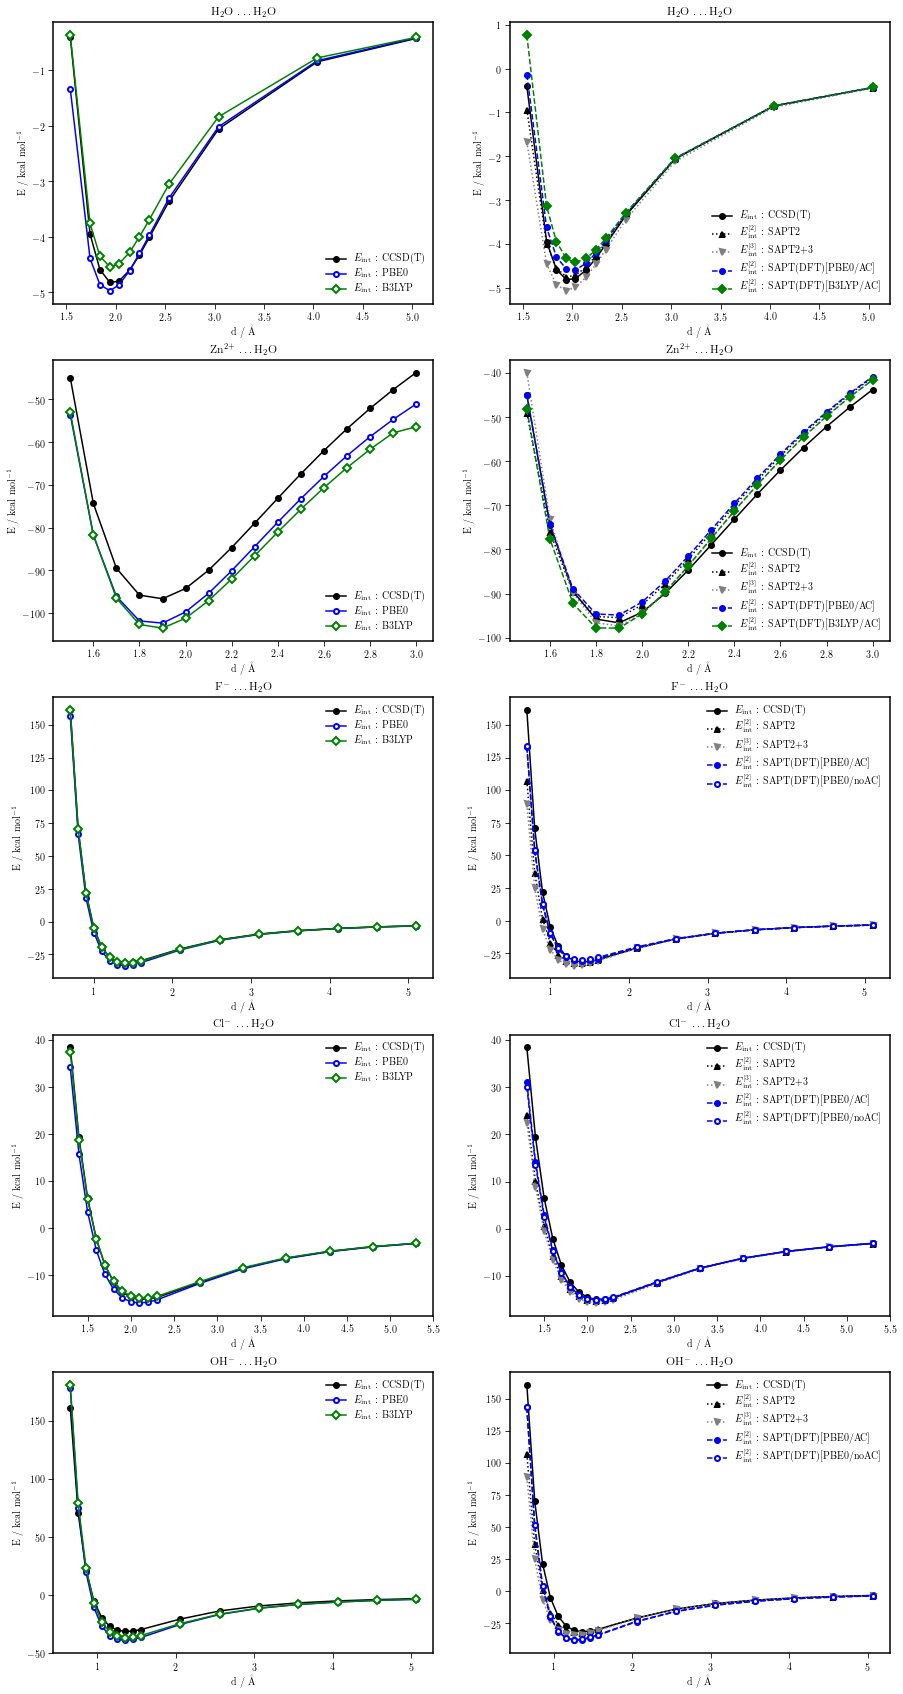

In [18]:
#cc_alpha = 0.4 # Control the alpha value of the CCSD(T) curves to stop them from being intrusive

Xlabel = 'd / \u00c5'
Ylabel = 'E / kcal mol$^{-1}$'

#Eint2  = '$E\mathrm{_{int}^{[2]}}$'

#fig = plt.figure(figsize=(21,15)) # taille horizontale x verticale
fig, grph = plt.subplots(5, 2, figsize=(15,30))

##########
# H20..H2O
##########

grph[0, 0].plot(d['water2']['d'],cc_ref['water2']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'$E_{\mathrm{int}}$ : CCSD(T)')
grph[0, 0].plot(d['water2']['d'],dft_pbe0['water2']['Eint'], 
                'b', linestyle='-', marker='o', markerfacecolor='white',
                label=r'$E_{\mathrm{int}}$ : PBE0')
grph[0, 0].plot(d['water2']['d'],dft_b3lyp['water2']['Eint'], 
                'g', linestyle='-', marker='D', markerfacecolor='white',
                label=r'$E_{\mathrm{int}}$ : B3LYP')
grph[0, 0].set_xlabel(Xlabel)
grph[0, 0].set_ylabel(Ylabel)
grph[0, 0].legend(loc='lower right',frameon=False)
grph[0, 0].set_title('H$_{2}$O \dots H$_{2}$O')

grph[0, 1].plot(d['water2']['d'],cc_ref['water2']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'$E_{\mathrm{int}}$ : CCSD(T)')
grph[0, 1].plot(d['water2']['d'],sapt2['water2']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{int}^{[2]}}$ : SAPT2')
grph[0, 1].plot(d['water2']['d'],sapt2p3['water2']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{int}^{[3]}}$ : SAPT2+3')
grph[0, 1].plot(d['water2']['d'],saptdft_pbe0['water2']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{int}^{[2]}}$ : SAPT(DFT)[PBE0/AC]')
grph[0, 1].plot(d['water2']['d'],saptdft_b3lyp['water2']['Eint'], 
                'g', linestyle='--', marker='D', markerfacecolor='g',
                label=r'$E\mathrm{_{int}^{[2]}}$ : SAPT(DFT)[B3LYP/AC]')
grph[0, 1].set_xlabel(Xlabel)
grph[0, 1].set_ylabel(Ylabel)
grph[0, 1].legend(loc='lower right',frameon=False)
grph[0, 1].set_title('H$_{2}$O \dots H$_{2}$O')

##########
# Zn..H2O
##########
grph[1, 0].plot(d['zn_h2o']['d'],cc_ref['zn_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'$E_{\mathrm{int}}$ : CCSD(T)')
grph[1, 0].plot(d['zn_h2o']['d'],dft_pbe0['zn_h2o']['Eint'], 
                'b', linestyle='-', marker='o', markerfacecolor='white',
                label=r'$E_{\mathrm{int}}$ : PBE0')
grph[1, 0].plot(d['zn_h2o']['d'],dft_b3lyp['zn_h2o']['Eint'], 
                'g', linestyle='-', marker='D', markerfacecolor='white',
                label=r'$E_{\mathrm{int}}$ : B3LYP')
grph[1, 0].set_xlabel(Xlabel)
grph[1, 0].set_ylabel(Ylabel)
grph[1, 0].legend(loc='lower right',frameon=False)
grph[1, 0].set_title('Zn$^{2+}$ \dots H$_{2}$O')

grph[1, 1].plot(d['zn_h2o']['d'],cc_ref['zn_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'$E_{\mathrm{int}}$ : CCSD(T)')
grph[1, 1].plot(d['zn_h2o']['d'],sapt2['zn_h2o']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{int}^{[2]}}$ : SAPT2')
grph[1, 1].plot(d['zn_h2o']['d'],sapt2p3['zn_h2o']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{int}^{[3]}}$ : SAPT2+3')
grph[1, 1].plot(d['zn_h2o']['d'],saptdft_pbe0['zn_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{int}^{[2]}}$ : SAPT(DFT)[PBE0/AC]')
grph[1, 1].plot(d['zn_h2o']['d'],saptdft_b3lyp['zn_h2o']['Eint'], 
                'g', linestyle='--', marker='D', markerfacecolor='g',
                label=r'$E\mathrm{_{int}^{[2]}}$ : SAPT(DFT)[B3LYP/AC]')
grph[1, 1].set_xlabel(Xlabel)
grph[1, 1].set_ylabel(Ylabel)
grph[1, 1].legend(loc='lower right',frameon=False)
grph[1, 1].set_title('Zn$^{2+}$ \dots H$_{2}$O')

##########
# F..H2O
##########
grph[2, 0].plot(d['f_h2o']['d'],cc_ref['f_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'$E_{\mathrm{int}}$ : CCSD(T)')
grph[2, 0].plot(d['f_h2o']['d'],dft_pbe0['f_h2o']['SCF-TOT'], 
                'b', linestyle='-', marker='o', markerfacecolor='white',
                label=r'$E_{\mathrm{int}}$ : PBE0')
grph[2, 0].plot(d['f_h2o']['d'],dft_b3lyp['f_h2o']['SCF-TOT'], 
                'g', linestyle='-', marker='D', markerfacecolor='white',
                label=r'$E_{\mathrm{int}}$ : B3LYP')
grph[2, 0].set_xlabel(Xlabel)
grph[2, 0].set_ylabel(Ylabel)
grph[2, 0].legend(loc='upper right',frameon=False)
grph[2, 0].set_title('F$^{-}$ \dots H$_{2}$O')

grph[2, 1].plot(d['f_h2o']['d'],cc_ref['f_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'$E_{\mathrm{int}}$ : CCSD(T)')
grph[2, 1].plot(d['f_h2o']['d'],sapt2['f_h2o']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{int}^{[2]}}$ : SAPT2')
grph[2, 1].plot(d['f_h2o']['d'],sapt2p3['f_h2o']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{int}^{[3]}}$ : SAPT2+3')
grph[2, 1].plot(d['f_h2o']['d'],saptdft_pbe0['f_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{int}^{[2]}}$ : SAPT(DFT)[PBE0/AC]')
grph[2, 1].plot(d['f_h2o']['d'],saptdft_pbe0_noac['f_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='white',
                label=r'$E\mathrm{_{int}^{[2]}}$ : SAPT(DFT)[PBE0/noAC]')
grph[2, 1].set_xlabel(Xlabel)
grph[2, 1].set_ylabel(Ylabel)
grph[2, 1].legend(loc='upper right',frameon=False)
grph[2, 1].set_title('F$^{-}$ \dots H$_{2}$O')

##########
# Cl..H2O
##########
grph[3, 0].plot(d['cl_h2o']['d'],cc_ref['cl_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'$E_{\mathrm{int}}$ : CCSD(T)')
grph[3, 0].plot(d['cl_h2o']['d'],dft_pbe0['cl_h2o']['SCF-TOT'], 
                'b', linestyle='-', marker='o', markerfacecolor='white',
                label=r'$E_{\mathrm{int}}$ : PBE0')
grph[3, 0].plot(d['cl_h2o']['d'],dft_b3lyp['cl_h2o']['SCF-TOT'], 
                'g', linestyle='-', marker='D', markerfacecolor='white',
                label=r'$E_{\mathrm{int}}$ : B3LYP')
grph[3, 0].set_xlabel(Xlabel)
grph[3, 0].set_ylabel(Ylabel)
grph[3, 0].legend(loc='upper right',frameon=False)
grph[3, 0].set_title('Cl$^{-}$ \dots H$_{2}$O')

grph[3, 1].plot(d['cl_h2o']['d'],cc_ref['cl_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'$E_{\mathrm{int}}$ : CCSD(T)')
grph[3, 1].plot(d['cl_h2o']['d'],sapt2['cl_h2o']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{int}^{[2]}}$ : SAPT2')
grph[3, 1].plot(d['cl_h2o']['d'],sapt2p3['cl_h2o']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{int}^{[3]}}$ : SAPT2+3')
grph[3, 1].plot(d['cl_h2o']['d'],saptdft_pbe0['cl_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{int}^{[2]}}$ : SAPT(DFT)[PBE0/AC]')
grph[3, 1].plot(d['cl_h2o']['d'],saptdft_pbe0_noac['cl_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='white',
                label=r'$E\mathrm{_{int}^{[2]}}$ : SAPT(DFT)[PBE0/noAC]')
grph[3, 1].set_xlabel(Xlabel)
grph[3, 1].set_ylabel(Ylabel)
grph[3, 1].legend(loc='upper right',frameon=False)
grph[3, 1].set_title('Cl$^{-}$ \dots H$_{2}$O')

##########
# OH..H2O
##########
grph[4, 0].plot(d['oh_h2o']['d'],cc_ref['oh_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'$E_{\mathrm{int}}$ : CCSD(T)')
grph[4, 0].plot(d['oh_h2o']['d'],dft_pbe0['oh_h2o']['SCF-TOT'], 
                'b', linestyle='-', marker='o', markerfacecolor='white',
                label=r'$E_{\mathrm{int}}$ : PBE0')
grph[4, 0].plot(d['oh_h2o']['d'],dft_b3lyp['oh_h2o']['SCF-TOT'], 
                'g', linestyle='-', marker='D', markerfacecolor='white',
                label=r'$E_{\mathrm{int}}$ : B3LYP')
grph[4, 0].set_xlabel(Xlabel)
grph[4, 0].set_ylabel(Ylabel)
grph[4, 0].legend(loc='upper right',frameon=False)
grph[4, 0].set_title('OH$^{-}$ \dots H$_{2}$O')

grph[4, 1].plot(d['oh_h2o']['d'],cc_ref['oh_h2o']['Eint'], 
                'k', linestyle='-', marker='o',
                label=r'$E_{\mathrm{int}}$ : CCSD(T)')
grph[4, 1].plot(d['oh_h2o']['d'],sapt2['oh_h2o']['Tot'], 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{int}^{[2]}}$ : SAPT2')
grph[4, 1].plot(d['oh_h2o']['d'],sapt2p3['oh_h2o']['Tot'], 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{int}^{[3]}}$ : SAPT2+3')
grph[4, 1].plot(d['oh_h2o']['d'],saptdft_pbe0['oh_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{int}^{[2]}}$ : SAPT(DFT)[PBE0/AC]')
grph[4, 1].plot(d['oh_h2o']['d'],saptdft_pbe0_noac['oh_h2o']['Eint'], 
                'b', linestyle='--', marker='o', markerfacecolor='white',
                label=r'$E\mathrm{_{int}^{[2]}}$ : SAPT(DFT)[PBE0/noAC]')
grph[4, 1].set_xlabel(Xlabel)
grph[4, 1].set_ylabel(Ylabel)
grph[4, 1].legend(loc='upper right',frameon=False)
grph[4, 1].set_title('OH$^{-}$ \dots H$_{2}$O')

In [19]:
fig.savefig('TOT_SAPT_SAPTDFT_DFT.pdf')